# Image Understanding Coursework : Introduction to OpenCV in python
#### David Griffiths &nbsp;&nbsp;&nbsp; david.griffiths.16@ucl.ac.uk









## Basic OpenCV functions

##### Import necessary libraries

In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import pylab as plt

##### Load image

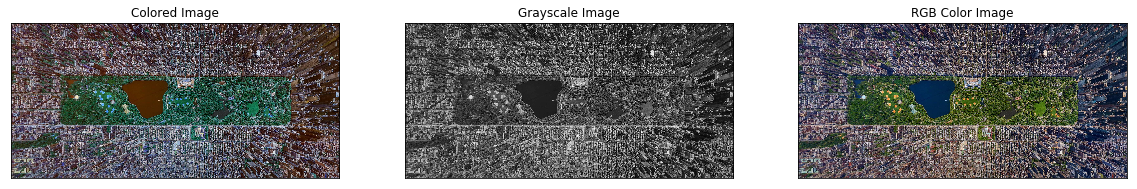

In [4]:
file = 'images/newyork.jpg'

# Load image in BGR colorspace
img_color = cv2.imread(file, 1)
#Load image in grayscale
img_gray = cv2.imread(file, 0)

img_color_RGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Plot images using matplotlib
images = [img_color, img_gray, img_color_RGB]
titles = ['Colored Image', 'Grayscale Image', 'RGB Color Image']
plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# To write an image specify the save directory and name:
new_file = 'images/newyork_grayscale.jpg'
# Write the image to disk
cv2.imwrite(new_file, img_gray)
print 'image successfully saved to: ' + new_file

##### Read and edit pixels

OpenCV images are stored in the form of numpy arrays. The numpy array has the dimensions (image height x image width x number of channels). The images can therefore be treated as standard numpy $n$ dimension arrays.

In [6]:
print ('One channel grayscale image: ', img_gray.shape)
print ('3 Chanel BGR colorspace image: ', img_color.shape)

One channel grayscale image:  (968, 2048)
3 Chanel BGR colorspace image:  (968, 2048, 3)


To access a specific pixel value basic numpy array indexing can be used. For example, to return the intensity of pixel x=500, y= 1000 you can use:

In [8]:
pixel = 500, 750

print (img_gray[pixel])
print (img_color[pixel])

31
[77 34  7]


Notice how the colour image has 3 channels and therefore three pixel intensities (Blue (0), Green (1), Red (2)). Further indexing can reutrn a specific intensity i.e:

In [9]:
blue = img_color[pixel][0]
green = img_color[pixel][1]
red = img_color[pixel][2]

**Task**: How would we create a simple 'for' loop to loop through every pixel in a given image.

In [10]:
# Try task here

## Geometric Transformations

When carrying out geometric transformations of an image it is important to think of the image as a standard matrix. This way typical linear algebra can be used to perform transformations.

##### Scaling

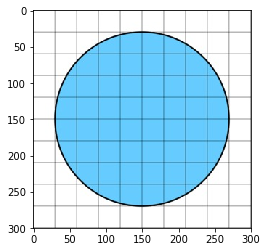

In [13]:
# First we will import a new image which which will allow us to easily see the result of the transformations.

img = cv2.imread('images/circle.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [22]:
# OpenCV offers a resize function which can be called using cv2.resize. 
# We will go through a few ways to use this function.

rows, cols, channels = img.shape

# Stretch collumns by a factor of 2
img_resize = cv2.resize(img, (cols*2, rows), interpolation = cv2.INTER_CUBIC)

# Notice the interpolation method here. OpenCV offers multiple interpolation functions.
# In general it is reccommended:
# Shrinking: cv2.INTER_AREA
# Zooming: cv2.INTER_CUBIC (slow) or cv2.INTER_LINEAR
# Default (general): cv2.INTER_LINEAR

# Half the size of the image
img_resize = cv2.resize(img, (int(cols/2), int(rows/2)), interpolation = cv2.INTER_AREA)

# Set to specified size
img_resize = cv2.resize(img, (180, 120),interpolation = cv2.INTER_LINEAR)

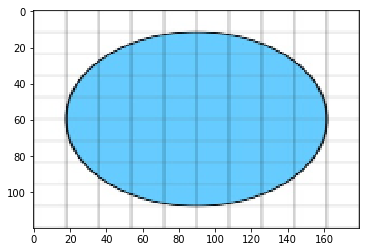

In [23]:
plt.imshow(img_resize)

##### Translation

OpenCV provides a function (`cv2.warpAffine`) to carry out affine transformations. The main requirements for this are the original image you wish to apply the transformation and the transformation matrix $M$. We must therefore first compute the transformation matrix $M$. If you know the shift in ($x$, $y$) that you wish to compute you can let:  

$M= \begin{bmatrix} 1 & 0 & ∆x \\ 0 & 1 & ∆y \end{bmatrix}$

In [24]:
M = np.float32([[1,0,25],[0,1,50]])
translation = cv2.warpAffine(img, M, (cols, rows))

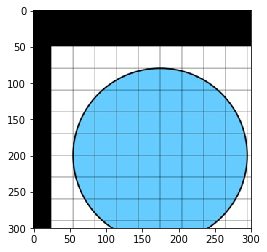

In [25]:
plt.imshow(translation)

Similarly a rotation matrix can be computed using an $M$ matrix following:

$M= \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}$

OpenCV provides a tool for creating these matrix with the function `cv2.getRotationMatrix2D`

M matrix 
 [[  0.90630779   0.42261826 -49.33890732]
 [ -0.42261826   0.90630779  77.44657121]] 


M offset matrix 
 [[  0.90630779   0.42261826 -82.23151219]
 [ -0.42261826   0.90630779 129.07761868]]


(<matplotlib.axes._subplots.AxesSubplot at 0x12232b588>,
 <matplotlib.image.AxesImage at 0x12245f2b0>)

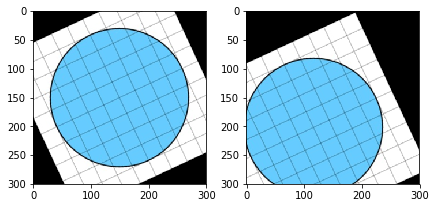

In [27]:
# Create rotation matrix for 25 degrees rotation in respect to the image center
M = cv2.getRotationMatrix2D((cols/2, rows/2), 25, 1)

# Create rotation matrix for 25 degrees rotation with different roation center
M_offset = cv2.getRotationMatrix2D((250, 250), 25, 1)

transformation = cv2.warpAffine(img, M, (cols, rows))
transformation_offset = cv2.warpAffine(img, M_offset, (cols, rows))

print ('M matrix \n', M, '\n\n')
print ('M offset matrix \n', M_offset)

plt.figure(figsize=(7,7))
plt.subplot(221), plt.imshow(transformation)
plt.subplot(222), plt.imshow(transformation_offset)

##### Affine transformation

In affine transformations all parallel lines will remain parallel after the transformation. OpenCV provides a function `cv2.getAffineTransformation` to determine the transformation matrix. The minimum number of points for an affine transformation is 3. To determine the $M$ matrix we must therefore make 2 3x1 matrix with the first containing the original co-ordinates of the points, the second will contain the location of the points after the transformation.

(<matplotlib.axes._subplots.AxesSubplot at 0x122493898>,
 <matplotlib.image.AxesImage at 0x122599908>)

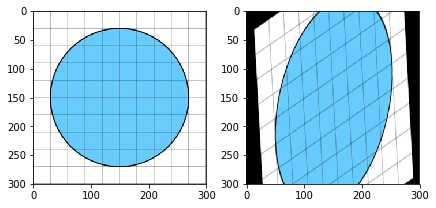

In [28]:
originalPts = np.float32([[50, 50], [100, 150], [180, 120]])
transformedPts = np.float32([[60, 75],[110, 190], [175, 100]])

# Determine M matrix
M = cv2.getAffineTransform(originalPts, transformedPts)

# Pass image and M matrix in cv2.warpAffine function
transformation = cv2.warpAffine(img, M, (cols, rows))

plt.figure(figsize=(7,7))
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(transformation)

##### Perspective transformation

Perspective transformation is similar to affine however instead of preserving parallel lines it preserves collinearity and incidence. As perspective offers an extra degree of translation 4 points are required to determine the $M$ matrix. By providing the co-ordinates in the same manner as the affine transformation, the matrix can be computed using the function `cv2.getPerspectiveTransform`. The transormation can then be carried out using `cv2.warpPerspective`.

(<matplotlib.axes._subplots.AxesSubplot at 0x12266cc88>,
 <matplotlib.image.AxesImage at 0x122732278>)

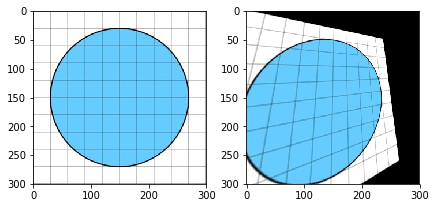

In [29]:
originalPts = np.float32([[50, 50], [100, 150], [180, 120], [30, 30]])
transformedPts = np.float32([[50, 53], [98, 155], [175, 120], [27, 31]])

# Determine M matrix
M = cv2.getPerspectiveTransform(originalPts, transformedPts)

# Pass image and M matrix in cv2.warpAffine function
transformation = cv2.warpPerspective(img, M, (cols, rows))

plt.figure(figsize=(7,7))
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(transformation)

## Image Thresholding

Basic thresholding in OpenCV is achieved through the `cv2.threshold` function. There are multiple options to determine how the threshold can be computed, but first we will create a simple binary threshold. 

**TASK:** Using the code we created earlier how could this be adapted into a simple binary classifier for a grayscale image with a critical value of 150?

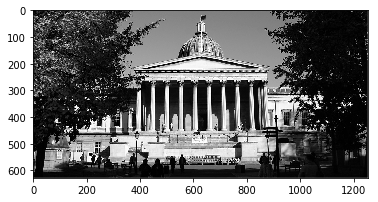

In [30]:
# First lets load and display an image in RGB colorspace
img = cv2.imread('images/ucl.jpg', 0)

plt.imshow(img, cmap='gray')

In [31]:
# Attempt task here

We will now carry this out using OpenCV. The function cv2.THRESH_BINARY defines the threshold style. The availble styles are:

`cv2.THRESH_BINARY`

`cv2.THRESH_BINARY_INV`

`cv2.THRESH_TRUNC`

`cv2.THRESH_TOZERO`

`cv2.THRESH_TOZERO_INV`

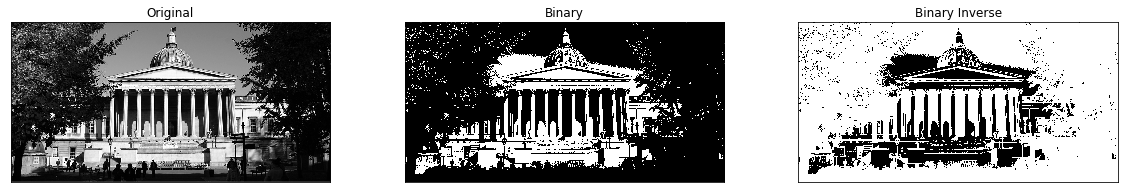

In [33]:
ret, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
ret, thresh_inv = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)

images = [img, thresh, thresh_inv]
titles = ['Original', 'Binary', 'Binary Inverse']
plt.figure(figsize=(20,10))
for i in range(len(images)):
    plt.subplot(3,3,i+1),plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Adaptive thresholding is used for images with varying lighting conditions. Instead of using a 1 constant value for the whole of the image we can split the image into regions and threshold each region individually based on the neighbourhood mean. This can give much more resonable results when the lighting changes greatly across an image (i.e. heavy shadows). We can also take the weighted sum of neighbourhood values where the weights are a gaussian window. This can be useful to reducing thresholds that are very noisy.

(<matplotlib.axes._subplots.AxesSubplot at 0x122664160>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

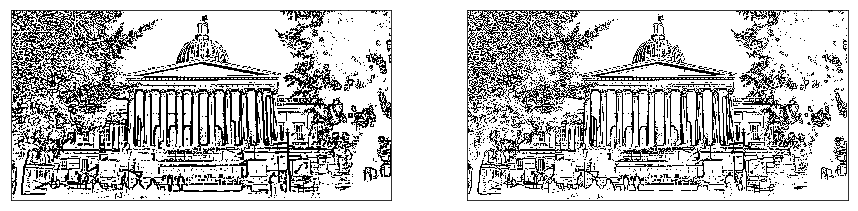

In [34]:
adaptive_thresh = cv2.adaptiveThreshold(img,255, \
                            cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,7)

adaptive_thresh_g = cv2.adaptiveThreshold(img,255, \
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,7)

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(adaptive_thresh, cmap='gray'), plt.xticks([]),plt.yticks([])
plt.subplot(222), plt.imshow(adaptive_thresh_g, cmap='gray'), plt.xticks([]),plt.yticks([])

##### Otsu's Binarisation

Otsu's binirisation is a method to automatically determine the threshold for a bimodal image. This attempts to find the optimum threshold value by converting the image to a histogram and finding the value in between the two main peaks. This method is therefore only suitable for bimodal images.

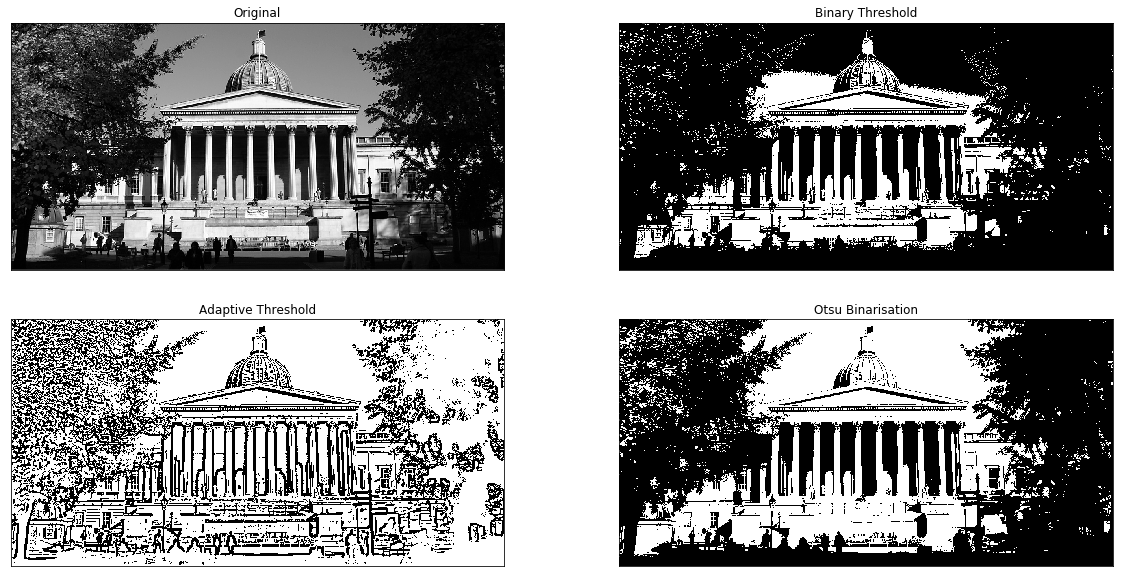

In [36]:
ret, otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images = [img, thresh, adaptive_thresh, otsu]
titles = ['Original', 'Binary Threshold', 'Adaptive Threshold', 'Otsu Binarisation']
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

##### RGB Thresholding

All the thresholding above works for grayscale images. However, sometimes the important details are related to the ratio of RGB colours, not just the overall intensity of the pixel. This is clearly visable in our New York image we loaded in earlier. The clearest and most obvious feature is Central Park.

In [37]:
# First lets load the image back into memory

img = cv2.imread('images/newyork.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(90,50))
cv2.imwrite('90x50.jpg',img_rgb)

True

<Figure size 6480x3600 with 0 Axes>

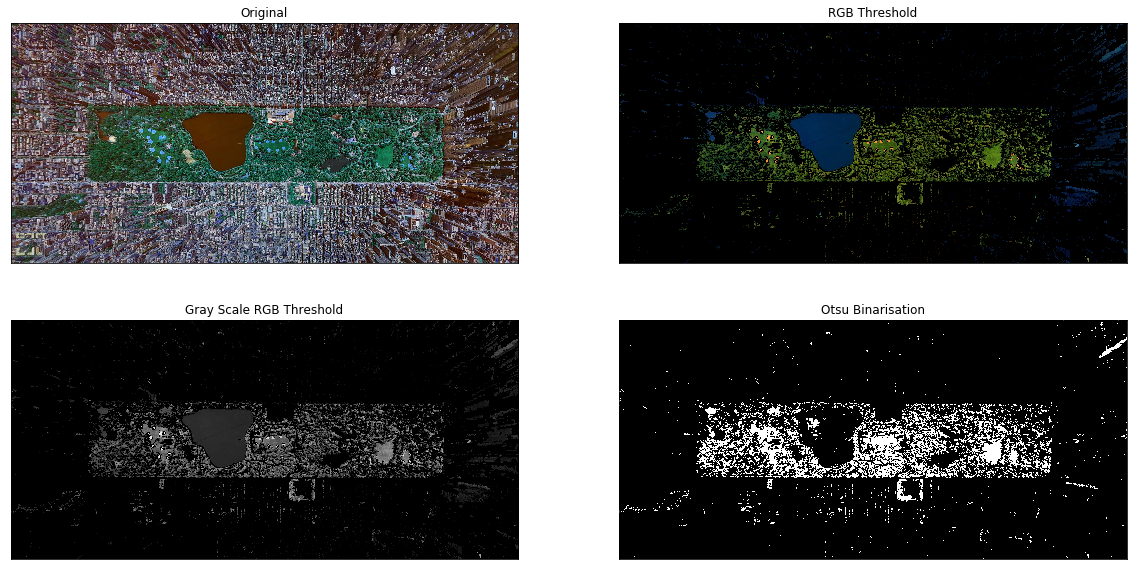

In [40]:
critical_thresh = 50

seg_img = img_rgb.copy()

for x in range(0, seg_img.shape[0]):
    for y in range(0, seg_img.shape[1]):
        r,g,b = seg_img[x, y]
        if g < r*2 and g < b*2:
            seg_img[x, y] = [0, 0, 0]
     
    
# Now we can apply a binarisation to the image to extract only the bit we want

# First convert to grayscale

seg_img_gray = cv2.cvtColor(seg_img, cv2.COLOR_RGB2GRAY)

# Or as before we can apply an otsu binarisation
ret, otsu = cv2.threshold(seg_img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images = [img, seg_img, seg_img_gray, otsu]
titles = ['Original', 'RGB Threshold', 'Gray Scale RGB Threshold', 'Otsu Binarisation']
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Alternatively, we could achieve this faster by converting into Hue, Saturation, Value (HSV) color space. In general it is quicker to represent a specific colour in HSV. There are lots of resources online explaining HSV colorspace and why it is useful. Here, we first create a mask using the `cv2.inRange` function. Once we have our mask we can then use `cv2.bitwise_and` function to compute a per-element bit-wise conjunction of the two images. `cv2.wise_and` also has a `XOR`, `OR` and `NOT` function.

A simple trick for finding HSV values is to find the RGB value a representative the pixel, then make a 3x1 numpy array and convert it from RGB to HSV using cv2.cvtColor. You can then use this value as a centre point for the range by adding and subtracting a value to the HUE for the upper and lower limits to make them look like they do above. [Here](https://alloyui.com/examples/color-picker/hsv) is a useful link for finding HSV values.

Note: Because we are dealing with 8Bit images here the HUE range is stored between 0 and 180 instead of 0 and 360. Therefore, you will need to half the hue value you derive from color pickers.



(<matplotlib.axes._subplots.AxesSubplot at 0x122a86a58>,
 Text(0.5, 1.0, 'Bitwise-AND mask'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 <matplotlib.image.AxesImage at 0x1195cba90>)

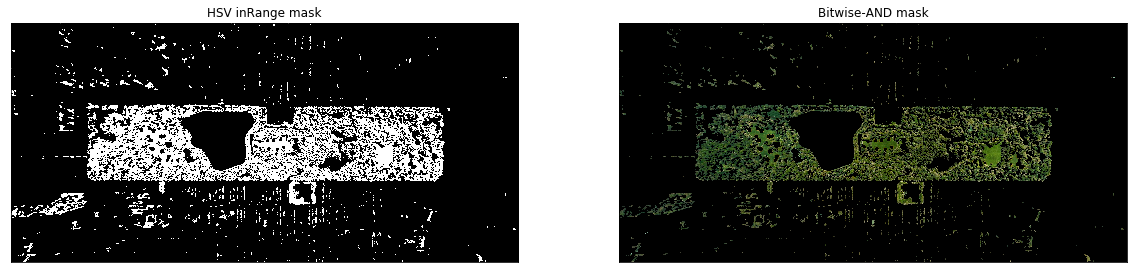

In [41]:
# First lets convert our image into HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Then define the limits for green
lower_green = np.array([25, 50, 50])
upper_green = np.array([75,255,255])

# Use cv2.inRange function to mask green pixels
mask = cv2.inRange(hsv_img, lower_green, upper_green)

# Computer per-element bit-wise conjunction
res = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.figure(figsize=(20,10))
plt.subplot(221), plt.title('HSV inRange mask'), plt.xticks([]),plt.yticks([]), plt.imshow(mask, cmap='gray')
plt.subplot(222), plt.title('Bitwise-AND mask'), plt.xticks([]),plt.yticks([]), plt.imshow(res, cmap='gray')

Have a think about how you could extract more than one color at a time, for example all strong red, green and blue features in an image. Have a go at this before next week. You can choose any image/colours you want, or you can try to extract the red, green and blue markings on the image below.

In [42]:
# Attempt task here before next week
# Try to find your own image, if you are stuck you can use this one:

img = cv2.imread('images/sign.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## Convolution Filters

Convolutional filters processes images by passing a matrix (kernel) over each pixel within an image. The dot product of the weighted kernel matrix and the overlaying pixels of the image is used to create a new pixel value at the given point. Each pass is often referred to as a convolution.  This can be used for common image processing such as blurring, sharpening and edge detection. OpenCV provides many pre-built functions for kernels convolutions as well as the `cv2.filter2D()` function which can be used to pass a custom-made filter over an image.

### Bluring

Bluring (or smoothing) is typically used in image processing for noise reduction and smoothing. Here we achieve this by convolving a low-pass filter kerel over an image.

##### Basic Blurring

In [44]:
img = cv2.imread('images/noise.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gs = cv2.imread('images/noise.jpg', 0)

# A simple averaging filter could be made by passing first creating a kerel
kernel = np.ones((5,5), np.float32)/25
# Using the filter2D function the image can be averaged
averaged_img = cv2.filter2D(img, -1, kernel)

#Alternatively we can use a pre-made OpenCV blur
mean_blur = cv2.blur(img_gs,(5,5))

#Median blurs are good for removing salt and pepper effects

img_sp = cv2.imread('images/salt.jpg', 0)


median_blur = cv2.medianBlur(img_sp, 5)

images = [img, mean_blur, img_sp, median_blur]
titles = ['Cat Image', 'Mean Blur', 'Salt and Pepper Image', 'Median Blur']
plt.figure(figsize=(20,10))
for i in range(len(images)):
    plt.subplot(2,2,i+1),plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

##### Gaussian and Bilateral Blurring

The gaussian blur uses the gaussian function to calculate each pixels transformation. The equation used to define the Guassian function in 2-dimensions ($x$ and $y$) is defined as: $G_{(x)} = \frac{1}{\sqrt{2\Pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}$. 

The resulting 3x3 kernel used is: $G~(x,y)= \begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix} * \frac{1}{16}$

As blurring filters smooth areas with a high variance of intensity they have a strong response to edges. This results in the smoothing of an edge. If our image processing problem is concerned with the edges this is not ideal. Bilateral filters preserve edges by considering the neighbouring pixels and weights assainged to them. The weights have two components, the first is the same weighting as used in the Gaussian kernel above. The second takes into account the difference in intensity between the neighbouring pixels and the evaluated one. A more detailed description of this can be [found here](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html).

If we are primarilly looking at denoising, OpenCV offers more specialised features for such tasks. Take a look at `cv2.fastNlMeansDenoising()` and `cv2.fastNlMeansDenoisingColored()` if you are dealing with images that contain a lot of noise.

(<matplotlib.axes._subplots.AxesSubplot at 0x1228db978>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5, 1.0, 'Gaussian Blur'))

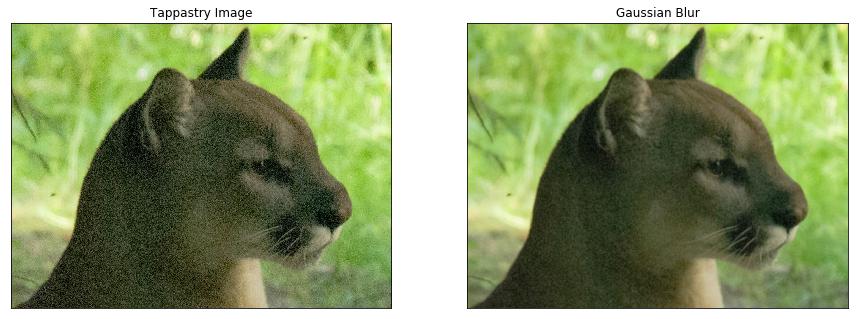

In [45]:
gaus_blur = cv2.GaussianBlur(img, (7, 7), 0)

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.xticks([]),plt.yticks([]), plt.title('Tappastry Image')
plt.subplot(222), plt.imshow(gaus_blur, cmap='gray'), plt.xticks([]),plt.yticks([]), plt.title('Gaussian Blur')

(<matplotlib.axes._subplots.AxesSubplot at 0x11f5572e8>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5, 1.0, 'Bilateral Blur'))

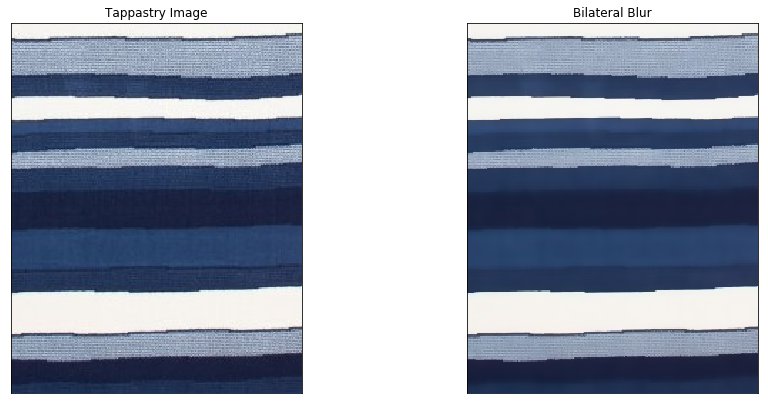

In [46]:

img_tapp = cv2.imread('images/tapp.jpg', 1)
img_tapp = cv2.cvtColor(img_tapp, cv2.COLOR_BGR2RGB)
img_tapp_gs = cv2.cvtColor(img_tapp, cv2.COLOR_BGR2GRAY)

bilateral = cv2.bilateralFilter(img_tapp, 9, 50, 55)

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(img_tapp, cmap='gray'), plt.xticks([]),plt.yticks([]), plt.title('Tappastry Image')
plt.subplot(222), plt.imshow(bilateral, cmap='gray'), plt.xticks([]),plt.yticks([]), plt.title('Bilateral Blur')

**TASK:** Before we carry on have a think about how blurring can be very useful in scenarios where we have applied thresholding. 

In [47]:
# Use this space to further analyse our thresholded images with blurring

### Edge Detection and Image Gradients

Edge detection is one of the most fundamental operations used in image processing. Edge detection can be used for feature extraction/segmentation as well as limiting operations to pixels with geometric interest. Here we will look at some of the most common edge detectors discussed in this module.

##### Sobel Operator 

The sobel operator is a kernal convolution that is used to find edges within an image. The sobel operator is a discrete differentiation operator which computes an approximation to the derivative of an image that is serperate in the x and y direction. This therefore responds strongly to areas where there is a high variation of pixel intensities. By default this is achieved by passing the following 3x3 kernels over a given image:

$G~x= \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$ &nbsp;&nbsp;&nbsp; $G~y= \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}$

Using the kernel size argument '`ksize`' the size of the kernel can be increased. If `ksize=-1` the Sharr derivative is used instead of the sobel. When using a 3x3 kernel size OpenCV reccommends using the Sharr kernal which is as follows:

$G~x= \begin{bmatrix} -3 & 0 & 3 \\ -10 & 0 & 10 \\ -3 & 0 & 3 \end{bmatrix}$ &nbsp;&nbsp;&nbsp; $G~y= \begin{bmatrix} -3 & -10 & -3 \\ 0 & 0 & 0 \\ 3 & 10 & 3 \end{bmatrix}$

In [49]:
img = cv2.imread('images/quad.jpg', 0)

# In OpenCV if you perform the sobel with datatype as 8 bit (cv2.CV_8U) only 
# the Black-to-White transition is visable. As the Black-to-White transition is
# negative this is made to 0. Therefore, we first perform the sobel in 64 bit
# and convert to 8bit for viewing.


sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
abs_sobel64f = np.absolute(sobelx64f)
sobelx_8u = np.uint8(abs_sobel64f)

sobely64f = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
abs_sobel64f = np.absolute(sobely64f)
sobely_8u = np.uint8(abs_sobel64f)

images = [img, sobelx_8u, sobely_8u]
titles = ['Original', 'Sobel X', 'Sobel Y']
plt.figure(figsize=(20,10))
for i in range(len(images)):
    plt.subplot(3,3,i+1),plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Whilst the sobel is useful for finding edges in the $x$ and $y$ directions independently, rarely would we use these as our final output. It would be more common to combine the two images which contains all edges. The below function shows us how given an image as input we can return an edge magnitude image for both $x$ any $y$ directions.

In [50]:
def getGradientMagnitude(im):
    ddepth = cv2.CV_32F
    dx = cv2.Sobel(im, ddepth, 1, 0)
    dy = cv2.Sobel(im, ddepth, 0, 1)
    dxabs = cv2.convertScaleAbs(dx)
    dyabs = cv2.convertScaleAbs(dy)
    mag = cv2.addWeighted(dxabs, 0.5, dyabs, 0.5, 0)
    return mag

In [52]:
# OpenCV offer a function to return the kernel coefficients

sobel7x_deriv = cv2.getDerivKernels(1, 0, 7)
sobel7y_deriv = cv2.getDerivKernels(0, 1, 7)

# To display this we need to compute the outer product of the two vectors

print ('Sobel 7x7 kernel x direction:\n', np.outer(sobel7x_deriv[1], sobel7x_deriv[0]))
print ('\nSobel 7x7 kernel y direction:\n', np.outer(sobel7y_deriv[1], sobel7y_deriv[0]))

Sobel 7x7 kernel x direction:
 [[  -1.   -4.   -5.    0.    5.    4.    1.]
 [  -6.  -24.  -30.    0.   30.   24.    6.]
 [ -15.  -60.  -75.    0.   75.   60.   15.]
 [ -20.  -80. -100.    0.  100.   80.   20.]
 [ -15.  -60.  -75.    0.   75.   60.   15.]
 [  -6.  -24.  -30.    0.   30.   24.    6.]
 [  -1.   -4.   -5.    0.    5.    4.    1.]]

Sobel 7x7 kernel y direction:
 [[  -1.   -6.  -15.  -20.  -15.   -6.   -1.]
 [  -4.  -24.  -60.  -80.  -60.  -24.   -4.]
 [  -5.  -30.  -75. -100.  -75.  -30.   -5.]
 [   0.    0.    0.    0.    0.    0.    0.]
 [   5.   30.   75.  100.   75.   30.    5.]
 [   4.   24.   60.   80.   60.   24.    4.]
 [   1.    6.   15.   20.   15.    6.    1.]]


##### Laplacian Edge Detector

The laplacian edge detector computes the residual of an image using the equation, $\frac{\partial^2src}{\partial x^2} + \frac{\partial^2src}{\partial y^2}$ where the derivatives for $x$ and $y$ are found using sobel in the $x$ and $y$ direction respectively. Due to this relationship when we call `cv2.Laplacian` the sobel operator is run internally. When the kernel size `ksize=1` the following filter is applied.

$G= \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$

Alternatively we could also adapt this to consider diagonals using the following:

$G~x= \begin{bmatrix} 1 & 1 & 1 \\ 1 & -8 & 1 \\ 1 & 1 & 1 \end{bmatrix}$

In [53]:
# Scaling can be used to scale the returned pixel intensity

laplacian = cv2.Laplacian(img, cv2.CV_8U, ksize=1, scale=1) 
abs_lap64f = np.absolute(laplacian)
lap_8u = np.uint8(abs_lap64f)

laplacian_s5 = cv2.Laplacian(img, cv2.CV_8U, ksize=1, scale=5)
abs_lap64f_s5 = np.absolute(laplacian_s5)
lap_8u_s5 = np.uint8(abs_lap64f_s5)

plt.figure(figsize=(20,10))
plt.subplot(221), plt.imshow(lap_8u, cmap='gray'), plt.title('Laplacian'), plt.xticks([]),plt.yticks([])
plt.subplot(222), plt.imshow(lap_8u_s5, cmap='gray'), plt.title('Laplacian Scaled x 5'), plt.xticks([]),plt.yticks([])

(<matplotlib.axes._subplots.AxesSubplot at 0x11ec464e0>,
 Text(0.5, 1.0, 'Laplacian Scaled x 5'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

##### Canny Edge Detector

Developed by John F. Canny in 1986, the canny edge detection algorithms extracts edges using a 5 stage approach:

* Noise removal and smoothing using Gaussian filter
* Gradient intensity representations for the image computed (Sobel)
* Apply non-maximum suppression to remove false edges
* Thresholding by applying an upper and lower boundary on the gradient values
* Hysteresis thresholding to track along connected edges

In OpenCV all of these steps are wrapped into 1 function `cv2.Canny`. The function takes 4 main arguments:

* Lower threshold for hysteresis thresholding (Double)
* Upper threshold for hysteresis thresholding (Double)
* Kernel size for sobel operator (Int)
* Whether or not to use $L_{2}$ norm for image gradient instead of the default $L_{1}$ (Bool)

In [54]:
img = cv2.imread('images/car.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

canny_lowthresh = cv2.Canny(img, 25,75,5,L2gradient=True)
canny_highthresh = cv2.Canny(img,100,250,5,L2gradient=True)

plt.figure(figsize=(20,15))
plt.subplot(221)
plt.imshow(canny_lowthresh, cmap='gray'), plt.title('Low threshold'), plt.xticks([]),plt.yticks([])
plt.subplot(222) 
plt.imshow(canny_highthresh, cmap='gray'), plt.title('High threshold'),  plt.xticks([]),plt.yticks([])

(<matplotlib.image.AxesImage at 0x119fd9b00>,
 Text(0.5, 1.0, 'High threshold'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

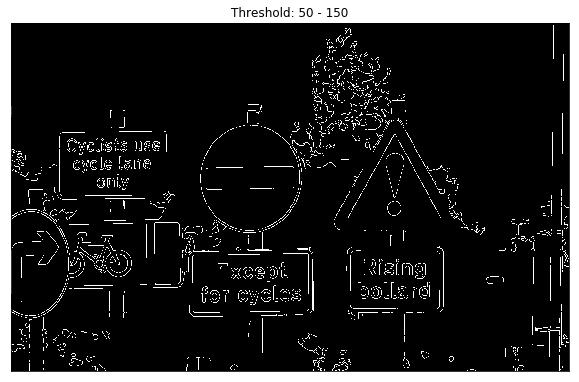

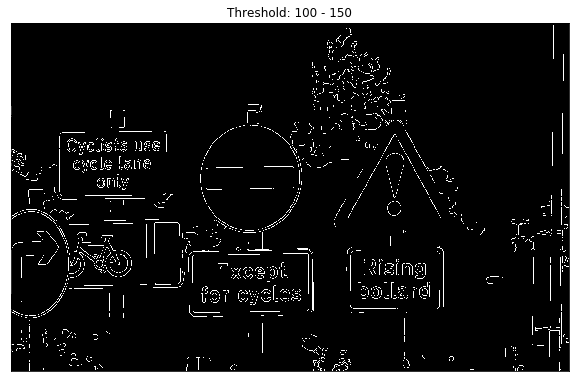

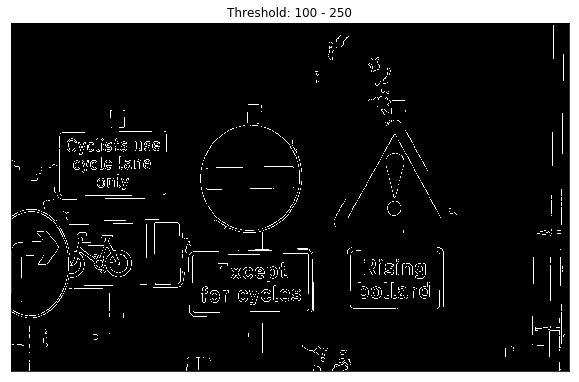

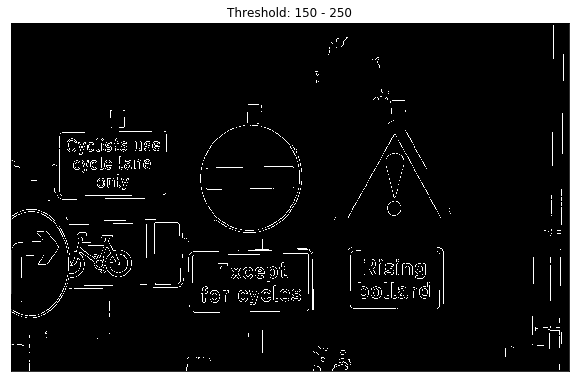

In [55]:
img = cv2.imread('images/road_signs.jpg', 0)

# Sometimes it is easier to set up a look up table instead of manually changing values
# First define values for look up table
lut = [[25, 50, 3, True],[50, 150, 3, True], [100,150, 3, True],[100,250, 3, True],[150,250, 3, True]]

#Run loop to compute canny with parameters defined by the LUT
for thresh in lut:
    canny = cv2.Canny(img,thresh[0],thresh[1],thresh[2],L2gradient=thresh[3])
    plt.figure(figsize=(10,10))
    plt.title( 'Threshold: '+str(thresh[0]) + ' - ' + str(thresh[1])), plt.xticks([]),plt.yticks([])
    plt.imshow(canny, cmap='gray')

## Contours

Until now we have been carrying out segmentation of images but have not had any real way of handling the segmented pixels. The easiest way to handle an extracted feature is to find the contours of the image. Contours are just a curve that connects continous points along a given boundary. To accurately find contours in OpenCV we need to first convert the image into a binary image. This can be achieved using the techniques discussed above (i.e. thresholding and edge detection). By using these tools we create a black feature of interest on a white background, if this is achieved contours can be easily drawn along these boundaries (preferrably white objects on black background). OpenCV returns countours in a list of coordinates that describe the shape of the contour it represents. If the contour is large the list will be large. To reduce this a contour approximation method can be used which only stores the important points (i.e. direction edges). If the contour is a very complicated shape this list may still be very long. This is very common when the contour line is derived from an edge detector and is very noisy. To correct for this we can apply a contour approximation which fits the contour to a similar (and more simple) shape (see the **Douglas-Peucker** algorithm for more information).

Let's take a look at how we can use the take a simple image feature and extract the contours and draw them back onto the image.

(<matplotlib.axes._subplots.AxesSubplot at 0x12277eeb8>,
 Text(0.5, 1.0, 'Contours'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

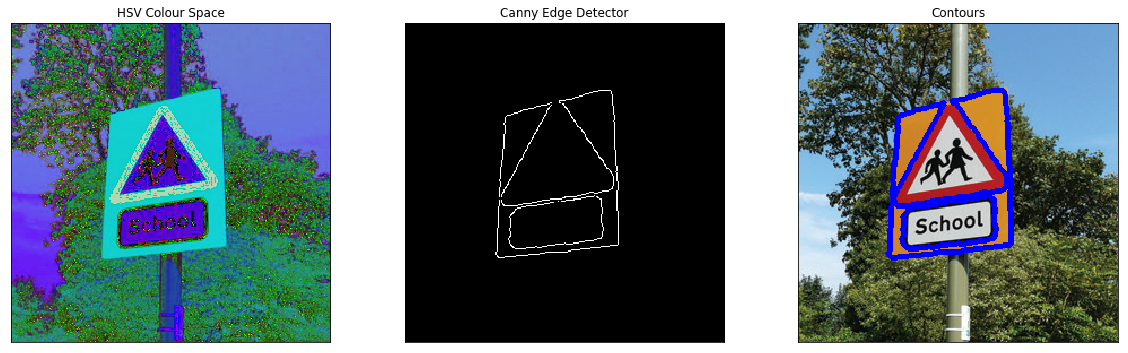

In [56]:
img = cv2.imread('images/school_sign.jpg', 1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert into HSV colorspace
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
blur_hsv = cv2.GaussianBlur(img_hsv, (7, 7), 0)

# Define limits for yellow
lower = np.array([10, 50, 50])
upper = np.array([20,255,255])

# Create mask and apply per-element bitwise conjunction
mask = cv2.inRange(blur_hsv, lower, upper)
res = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

# Convert to gray scale and perform threshold and canny edge detection
gray = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
ret, otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
canny = cv2.Canny(otsu,0,255,3)

# Find contours of canny edge detection
image, contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Draw contours onto image
cont_img = cv2.drawContours(img_rgb, contours, -1,(0,0,255),3)        

plt.figure(figsize=(20,20))
plt.subplot(331), plt.imshow(img_hsv), plt.title("HSV Colour Space"), plt.xticks([]),plt.yticks([])
plt.subplot(332), plt.imshow(canny, cmap='gray'), plt.title("Canny Edge Detector"), plt.xticks([]),plt.yticks([])
plt.subplot(333), plt.imshow(cont_img), plt.title("Contours"), plt.xticks([]),plt.yticks([])

In the example above the contours had very simple shapes. Lets take a look at some examples where this isn't the case.

In [57]:
img = cv2.imread('images/ucl.jpg', 1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Apply gaussian blur
blur_hsv = cv2.GaussianBlur(img_hsv, (7, 7), 0)

# Define upper and lower mask limits
lower = np.array([0, 0, 0])
upper = np.array([200,60,255])
mask = cv2.inRange(blur_hsv, lower, upper)
res = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

# Convert to grayscale, threshold and perform canny edge detection
gray = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
ret, otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
canny = cv2.Canny(otsu,0,255,3)

# Find image contours
image, contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

contour_list = []

# Compute shape approximation for each contour
for shape in contours:
        epsilon = 1e-3*cv2.arcLength(shape,True)
        approx = cv2.approxPolyDP(shape,epsilon,True)
        contour_list.append(approx)

# Draw contours onto image
cont_img = cv2.drawContours(img_rgb, contours, -1,(0,0,255),3)        
cont_approx = cv2.drawContours(img_rgb, contour_list, -1,(0,0,255),3)        

plt.figure(figsize=(20,20))
plt.subplot(331), plt.imshow(img_hsv, cmap='gray'), plt.title("HSV Colour Space"), plt.xticks([]),plt.yticks([])
plt.subplot(332), plt.imshow(otsu, cmap='gray'), plt.title("Threshold"), plt.xticks([]),plt.yticks([])
plt.subplot(333), plt.imshow(cont_approx), plt.title("Contours"), plt.xticks([]),plt.yticks([])

(<matplotlib.axes._subplots.AxesSubplot at 0x11f873c50>,
 Text(0.5, 1.0, 'Contours'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

(<matplotlib.axes._subplots.AxesSubplot at 0x11f990978>,
 Text(0.5, 1.0, 'Convex Hull'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

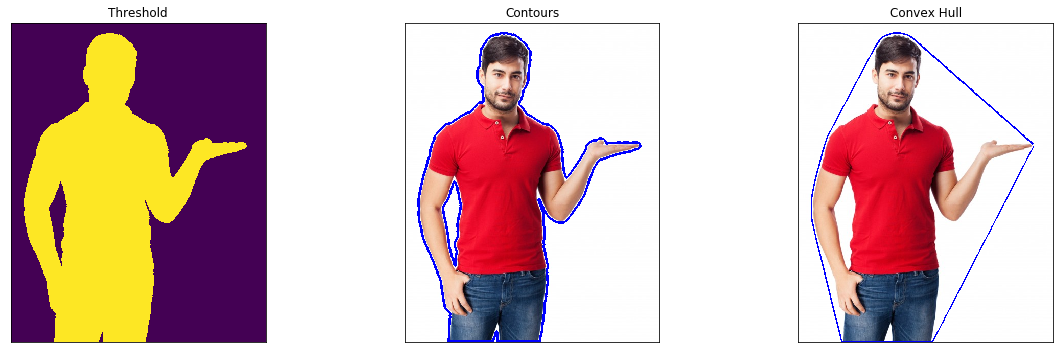

In [58]:
img_rgb = cv2.imread('images/guy.jpg', 1)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
img_gray = cv2.imread('images/guy.jpg', 0)

# Blur, threshold and find contours
bilateral = cv2.bilateralFilter(img_gray, 9, 50, 55)
ret, thresh = cv2.threshold(bilateral,253,255,cv2.THRESH_BINARY_INV)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

contour_list = []

# Compute shape approximation for each contour
for shape in contours:
        epsilon = 1e-4*cv2.arcLength(shape,True)
        approx = cv2.approxPolyDP(shape,epsilon,True)
        contour_list.append(approx)

# Find largest contour by area size
c = max(contours, key = cv2.contourArea)
hull = cv2.convexHull(c)

hull_img = img_rgb.copy()

# Draw lines between each convex hull point
for i, point in enumerate(hull):
    try:
        cv2.line(hull_img, (point[0][0],point[0][1]), (hull[i+1][0][0], hull[i+1][0][1]), (0, 0, 255), 2)
    except:
        pass

# Draw contours onto image
cont_img = cv2.drawContours(img_rgb, contours, -1,(0,0,255),3)
        
plt.figure(figsize=(20,20))
plt.subplot(331), plt.title("Threshold"), plt.imshow(thresh), plt.xticks([]),plt.yticks([])
plt.subplot(332), plt.title("Contours"), plt.imshow(cont_img), plt.xticks([]),plt.yticks([])
plt.subplot(333), plt.title("Convex Hull"), plt.imshow(hull_img), plt.xticks([]),plt.yticks([])

The last operator we will look at is returning the bounding box of the object. This is particularily useful for minimising the ROI for a segmentation problem. Furthermore, it is a good way to test object detection models as it allows for an Intersection Over Union (IOU) to be easily applied. Bounding boxes are computed with the function `cv2.boundingRect()` function.

In [59]:
bbox_list = []

for c in contour_list:
    x, y, w, h = cv2.boundingRect(c)
    bbox_list.append([x, y, x+w, y+h])
    
# We can then visualise our bounding box by drawing it as rectangle

bbox_img = img_rgb.copy()

cv2.rectangle(bbox_img, (bbox_list[0][0], bbox_list[0][1]), (bbox_list[0][2], bbox_list[0][3]), (0, 255, 0), 2)
plt.figure(figsize=(7,7)), plt.imshow(bbox_img), plt.xticks([]),plt.yticks([])

(<Figure size 504x504 with 1 Axes>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

Final thought: How might [K-Means Clustering](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_index.html#kmeans-clustering) be used to as a pre-processing stage before manual color selection for categorising images into $k$ number of colours? This is very powerful for feature and background extraction as well as a range of other segmentation problems. Let's take a look at how we could have approached the New York central park problem. The code below is shown as an example but I reccommend you take a look through the link above (where this code is borrowed from).

OpenCV offers support for a range of machine leaning techniques. Explore how you can use them for image processing problems.

In [60]:
img = cv2.imread('images/newyork.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Re-shape image into array Mx3 where M in number of pixels
Z = img.reshape((-1,3))

# Convert to 32 bit data type
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

# Convert image into HSV colour space
img_hsv = cv2.cvtColor(res2, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(20,20))
plt.subplot(331), plt.title("Original Image"), plt.imshow(img), plt.xticks([]),plt.yticks([])
plt.subplot(332), plt.title("K-Means Clustering"), plt.imshow(res2), plt.xticks([]),plt.yticks([])
plt.subplot(333), plt.title("HSV K-Means image"), plt.imshow(img_hsv), plt.xticks([]),plt.yticks([])

(<matplotlib.axes._subplots.AxesSubplot at 0x11daf4c88>,
 Text(0.5, 1.0, 'HSV K-Means image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

In [61]:
# If you wanted to return all the values of the HSV image to apply a threshold
# you could simply add all the values to a list and use np.unique() to find the
# unique values.

pix_list = []

for x in range(img_hsv.shape[0]):
    for y in range(img_hsv.shape[1]):
        pix_list.append(img_hsv[x, y])

np.unique(pix_list, axis=0)

array([[  3,  17, 167],
       [ 17,  19,  93],
       [105,  68,  45]], dtype=uint8)

## Morphological Transformations

The last topic we will look at is morphological transformations. As the name suggests we are going to make physical changes to the shape of images. This is usually performed on binary images although it is possible to carry this out on RGB images if appropriate measures are taken. The most common forms of morphological transformations are:

* Dilation
* Erosion
* Opening
* Closing

However, OpenCV offers support for a larger number of transformations. Also, take a look at [scikit-image](http://scikit-image.org) where you can find many unique and novel transformations.

#### Dilation

Dilation works by applying a predefined kernel (usually consisting of 1's) over each pixel of the image. If any pixel returns a value of 1 within the kernel the pixel is expanded to the size of the kernel. This results in the shape of the object increasing in size. 

Unique K-Means pixel values 

 [[  1 172 212]
 [ 40 196  56]
 [ 44  42 135]
 [100   7 226]
 [107 245 186]]


(<matplotlib.axes._subplots.AxesSubplot at 0x11f59a1d0>,
 Text(0.5, 1.0, 'Dilation'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

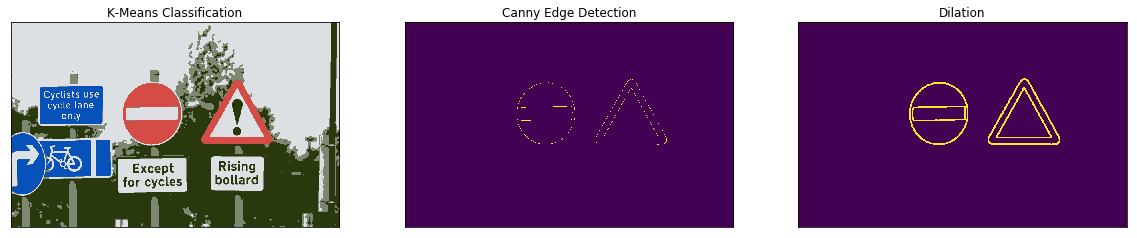

In [63]:
img = cv2.imread('images/road_signs.jpg', 1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Re-shape image into array Mx3 where M in number of pixels
Z = img_rgb.reshape((-1,3))
# Convert to 32 bit data type
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

# Convert image to HSV color space and set upper and lower limits
img_hsv = cv2.cvtColor(res2, cv2.COLOR_RGB2HSV)
lower = np.array([0, 0, 0])
upper = np.array([10,255,255])

# Create mask and apply per-element bitwise conjunction
mask = cv2.inRange(img_hsv, lower, upper)
res = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

# Conver to grayscale, threshold and perform canny edge detection
gray = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
ret, otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
canny = cv2.Canny(otsu,0,255,3)

pix_list = []

# Loop through all pixels and add to list
for x in range(img_hsv.shape[0]):
    for y in range(img_hsv.shape[1]):
        pix_list.append(img_hsv[x, y])

# Print unique pixel HSV value
print ("Unique K-Means pixel values \n\n", np.unique(pix_list, axis=0))

# Create kernel
kernel = np.ones((5,5),np.uint8)
# Perform dilation
dilation = cv2.dilate(canny,kernel,iterations = 1)

plt.figure(figsize=(20,15))
plt.subplot(331), plt.imshow(res2), plt.title("K-Means Classification"), plt.xticks([]),plt.yticks([])
plt.subplot(332), plt.imshow(canny), plt.title("Canny Edge Detection"), plt.xticks([]),plt.yticks([])
plt.subplot(333), plt.imshow(dilation), plt.title("Dilation"), plt.xticks([]),plt.yticks([])

#### Erosion

Erosion works similarily to dilation but in the opposite direction. In erosion all the pixels must be 1 in the kernel otherwise the pixel will be given the value of 0 (eroded). This is particularly useful when removing small noise.

(<matplotlib.axes._subplots.AxesSubplot at 0x12af7feb8>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5, 1.0, 'Erosion'),
 <matplotlib.image.AxesImage at 0x12afd6cf8>)

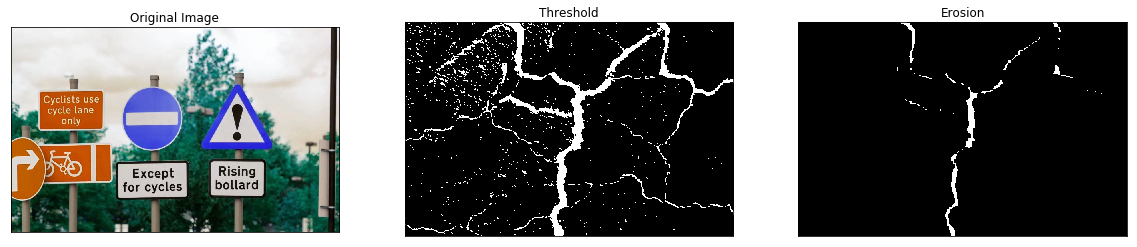

In [64]:
img = cv2.imread('images/crack.jpg', 0)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresh,kernel,iterations = 1)

plt.figure(figsize=(20,20))
plt.subplot(331), plt.xticks([]),plt.yticks([]), plt.title("Original Image"), plt.imshow(img_rgb, cmap='gray')
plt.subplot(332), plt.xticks([]),plt.yticks([]), plt.title("Threshold"), plt.imshow(thresh, cmap='gray')
plt.subplot(333), plt.xticks([]),plt.yticks([]), plt.title("Erosion"), plt.imshow(erosion, cmap='gray')

#### Opening

Opening is effectively an erosion followed by dilation. This allows for noise removal without loosing volume to the shape we are working on.

In [65]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(20,20))
plt.subplot(221), plt.xticks([]),plt.yticks([]), plt.title("Erosion"), plt.imshow(erosion, cmap='gray')
plt.subplot(222), plt.xticks([]),plt.yticks([]), plt.title("Opening"), plt.imshow(opening, cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x12b6c53c8>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5, 1.0, 'Opening'),
 <matplotlib.image.AxesImage at 0x12b822f98>)

#### Closing

Closing is the opposite to opening. It is effectively a dilation followed by erosion. This is very useful for closing small holes within the feature of interest.

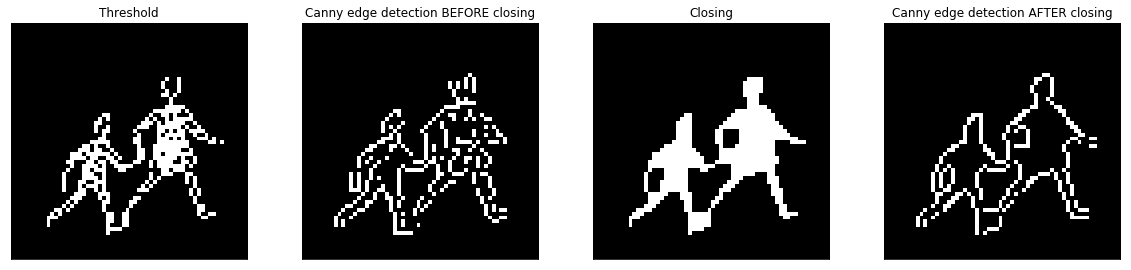

In [67]:
img = cv2.imread('images/school_sign.jpg', 1)
img_crop = img[90:150,100:160]
img_rgb = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img_gray, 15, 75, cv2.THRESH_BINARY_INV)
canny_bc = cv2.Canny(thresh,0,255,3)

kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

canny_ac = cv2.Canny(closing,0,255,3)

images = [thresh, canny_bc, closing, canny_ac]
titles = ['Threshold', 'Canny edge detection BEFORE closing', \
          'Closing', 'Canny edge detection AFTER closing']
plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(4,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Coursework

### Task

Your task is to use OpenCV and Numpy tools to extract a specific feature(s) from a single (group of) image(s). The feature(s) of choice as well as image(s) is up to you. It can be imagery acquired from satellite, aerial or terrestrial methods as well as your choice of spectral bands (i.e. R, G, B, NIR, SWIR etc.). You are encouraged to think outside-the-box and use internet resources such as tutorials to incorporate new methods not discussed within these practicals. 

You should assess the accuracies of your proposed solution, highlighting the strengths and weaknesses. To achieve this you should design/incorporate some form of accuracy indicator. The accuracy assessment should be undertaken both on images you designed the solution around, as well as new images your system has not seen before. You should comment on why you think the solution is performing the way it is. A good start here would be to look at the Intersection Over Union (IOU) method. [Here](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/) is a good write up of how you could incorporate this into your project. Remember how we generated the bounding box for the segmentation above. Any accuracy assessment is acceptable providing it is justified.

### Delivery

The coursework comprises two components. First, a 2000 word research report style write up (i.e. Introduction, Methodology, Results, Discussion, Conclusion), where the segmentation problem is presented as a research problem that is investigated through the methods outlined and solved in the analysis. The discussion should connect to the wider literature to consider the approaches used by others to solve similar problems.

As a general guideline the report could be structured (although not restricted to) as follows:

**1. Introduction**
   * What am I trying to detect? 
   * What application would this be useful for? 
   * What methods will I incorporate with the solution
   * What are the initial obstacles in my way


**2. Methodology**
   * What is my approach to solving the problem
   * Why have I chosen certain algorithms
   * Briefly, how do these algorithms work (you would not need to go to a mathematical level here)
   * How will you assess accuracy


**3. Results**
   * Display images of your results (the good and the bad)
   * Comment on what you see
   * Record accuracy assessment results and initial comments
    
    
**4. Discussion**
   * How do you feel your proposed solution performed
   * If it was good why?
   * If it was bad why?
   * How does this compare to other solutions are there?
   * What could be done to improve the solution?
    
    
**5. Conclusion**
   * Short conclusion outlining the key components of your report

Second, a file (preferrably .py / .ipynb) containing the source code for your solution. This should be properly annotated and commented. For advice on how to correctly format code for delivery take a look [here](https://www.python.org/dev/peps/pep-0008/). It is important to provide frequent in-line comments to explain what your code is doing. Finally, if you use functions, they should be properly commented showing their input and output arguments as well as a brief description of the function.

### Deadline

Both documents should be uploaded to moodle by **28th March 2018**.